# Udacity Self-Driving Car Nanodegree

## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

## Imports

In [11]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

## Camera Calibration

### First step, let's take a good look into the images we are working with

As we take a look to all images into a grid, we can already calculate the objpoints and imgpoints that we can store for a later usage.
Not all the images in the sample actually matches the description of the 9 by 6 chess board, meaning that we won't be able to record points for all images.

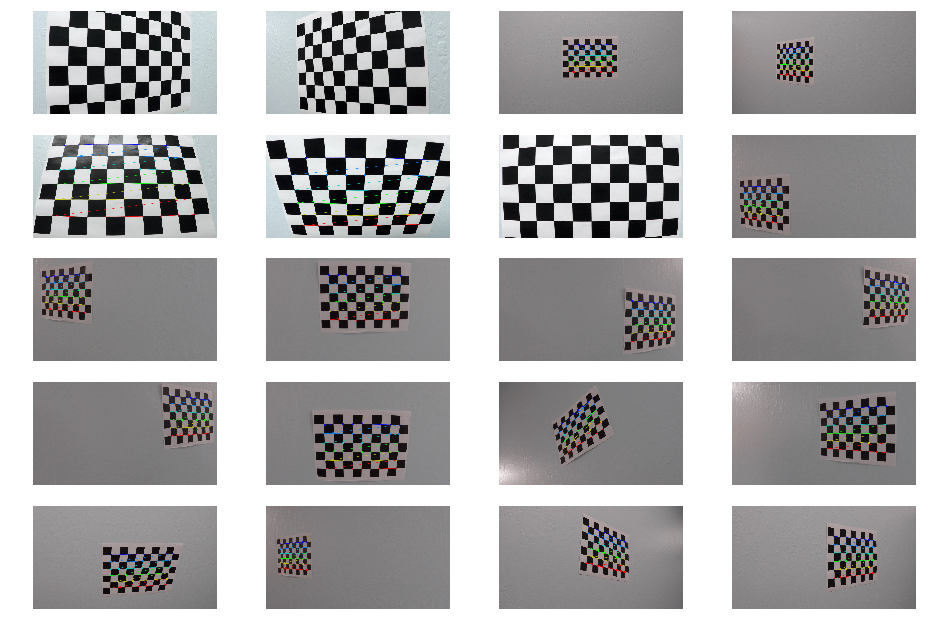

In [21]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
valid_images = [] # images that contain a 9 by 6 grid
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

fig, axs = plt.subplots(5,4, figsize=(16, 11))
axs = axs.ravel()

# Go through the images one by one
for i, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        valid_images.append(img)
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        
    axs[i].axis('off')
    axs[i].imshow(img)

Next in our pipeline we are going to calibrate the camera

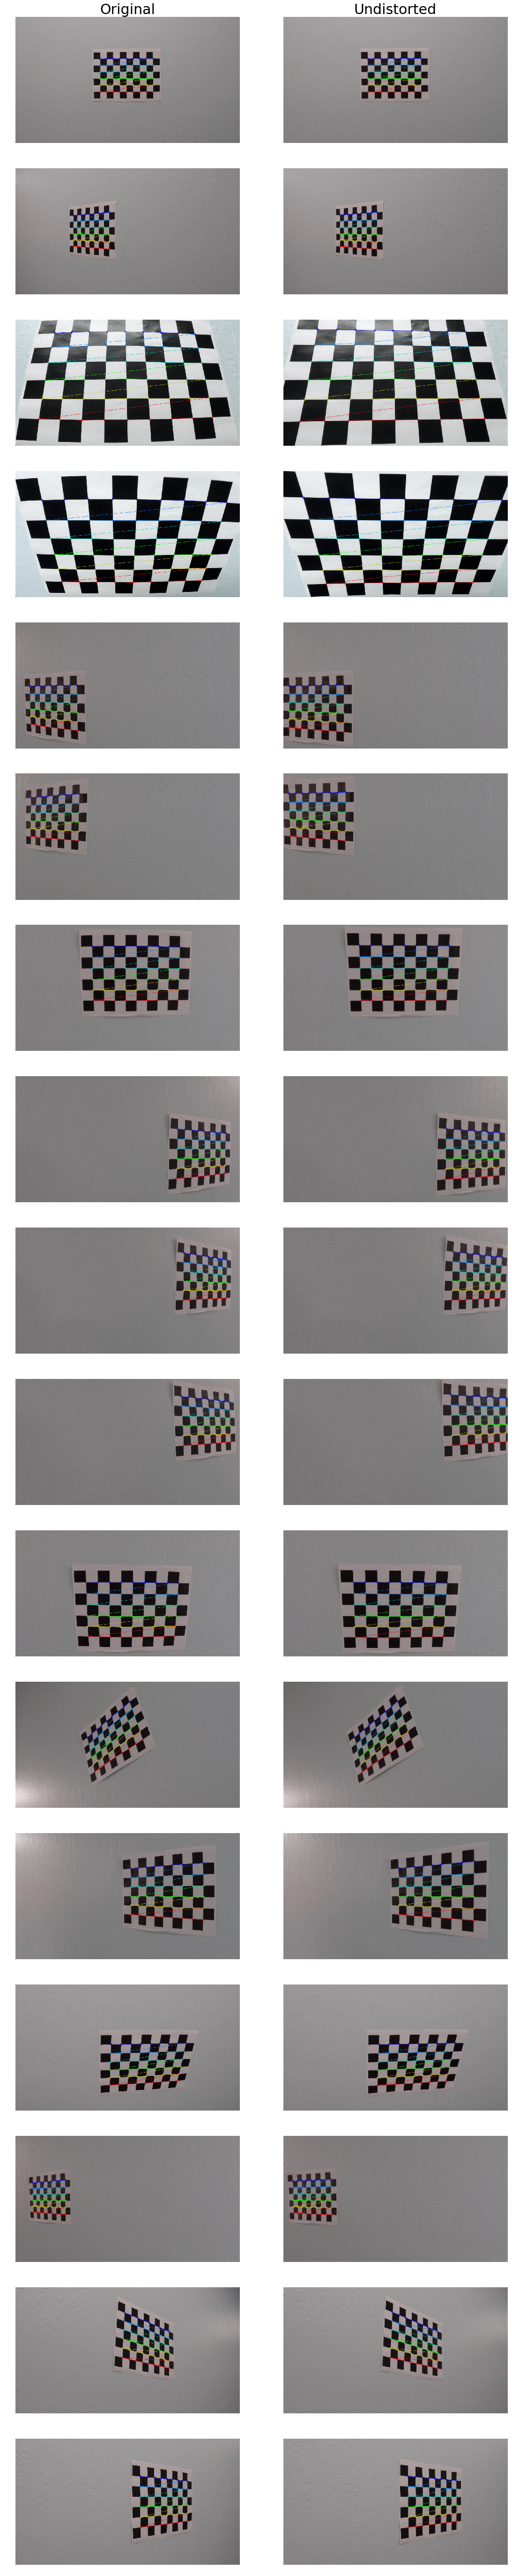

In [46]:
img_size = (valid_images[0].shape[1], valid_images[0].shape[0])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

fig, axs = plt.subplots(len(valid_images),2, figsize=(20, 100))
fig.subplots_adjust(hspace = .2, wspace=.05)
axo = axs[:,0]
axm = axs[:,1]
axo[0].set_title('Original', fontsize=30)
axm[0].set_title('Undistorted', fontsize=30)

for i, img in enumerate(valid_images):
    axo[i].axis('off')
    axo[i].imshow(img)
    
    # camera calibration happening here
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    
    
    axm[i].axis('off')
    axm[i].imshow(dst)
